In [1]:
!pip install segments-ai
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!git clone https://github.com/txh2020/fast-labeling-workflow
%cd fast-labeling-workflow

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 1.7 MB/s eta 0:00:00
  Created wheel for segments-ai: filename=segments_ai-1.0.26-py3-none-any.whl size=38122 sha256=76dd5b859024289af9145eeaeb1345c10dbb276dfd2ac65d18198ddd0d82a369
  Stored in directory: /root/.cache/pip/wheels/bf/f2/81/347c4f6520c66ad3777a24b865a5d81ff79440e00c10ce751e
Successfully built segments-ai
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-9qr_7ckg
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-9qr_7ckg
  Resolved https://github.com/facebookresearch/detectron2.git to commit 57bdb21249d5418c130d54e2ebdc94dda7a4c01a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setu

# Already Done.

In [2]:
from segments import SegmentsClient

api_key = "6b92d0474f7047d8fffa4a8ed0bacec5a41795e1"
segments_client = SegmentsClient(api_key)

In [3]:
dataset_identifier = "tejash/samsung_sample"

In [4]:
from segments import SegmentsDataset

# Initialize a dataset from the release file
release = segments_client.get_release(dataset_identifier, 'v0.4')
dataset = SegmentsDataset(release, labelset='ground-truth',filter_by='Reviewed')

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 118/118 [00:33<00:00,  3.57it/s]

Initialized dataset with 118 images.


IMG20230603100909.jpg


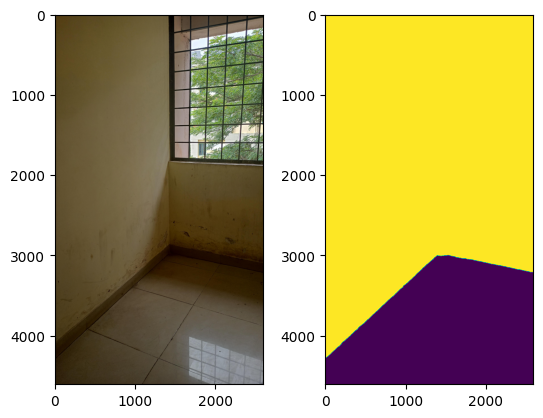

IMG20230603100303.jpg


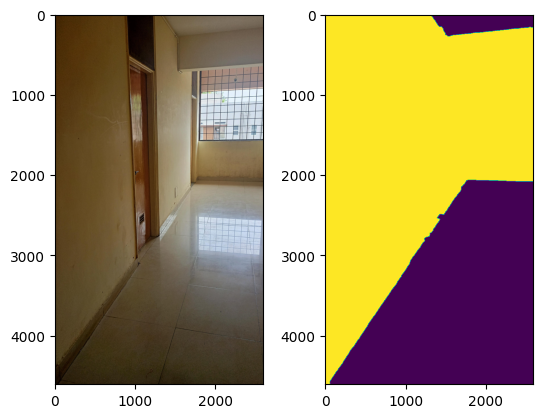

IMG20230603100342.jpg


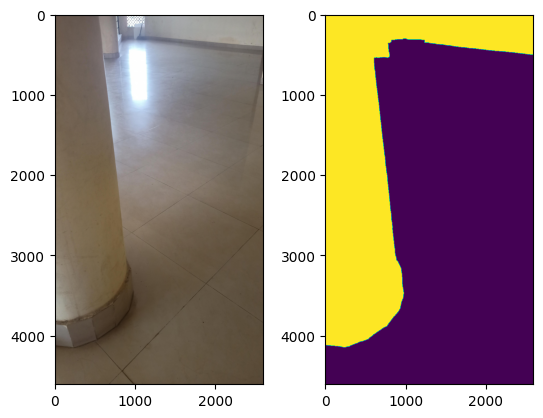

IMG20230603100347.jpg


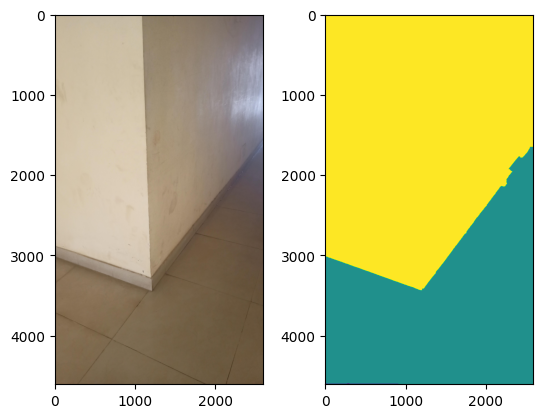

kitchen_343.jpg


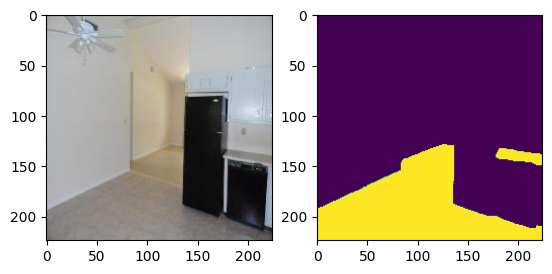

In [ ]:
from utils import visualize

# Visualize a few samples in the dataset
i=1
for sample in dataset:
    if(i==6):
      break
    print(sample['name'])
    visualize(sample['image'], sample['segmentation_bitmap'])
    i+=1

In [ ]:
from utils import train_model
model = train_model(dataset)

Exporting dataset. This may take a while...


100%|██████████| 118/118 [00:32<00:00,  3.63it/s]


Exported to ./export_coco-instance_tejash_samsung_sample_v0.4.json. Images in segments/tejash_samsung_sample/v0.4
Metadata(name='my_dataset', json_file='./export_coco-instance_tejash_samsung_sample_v0.4.json', image_root='segments/tejash_samsung_sample/v0.4', evaluator_type='coco', thing_classes=['horizontal_surface', 'vertical_surface'])
[07/07 15:06:32 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(25

model_final_f10217.pkl: 178MB [00:02, 85.1MB/s]                          
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[07/07 15:06:35 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/07 15:06:57 d2.utils.events]:  eta: 0:19:34  iter: 19  total_loss: 2.438  loss_cls: 1.004  loss_box_reg: 0.5011  loss_mask: 0.6917  loss_rpn_cls: 0.1313  loss_rpn_loc: 0.1085    time: 0.9139  last_time: 0.9566  data_time: 0.4295  last_data_time: 0.4475   lr: 4.9953e-06  max_mem: 2752M
[07/07 15:07:19 d2.utils.events]:  eta: 0:17:53  iter: 39  total_loss: 2.362  loss_cls: 0.9174  loss_box_reg: 0.4786  loss_mask: 0.6876  loss_rpn_cls: 0.1362  loss_rpn_loc: 0.1092    time: 0.9193  last_time: 0.9997  data_time: 0.4085  last_data_time: 0.5041   lr: 9.9902e-06  max_mem: 2753M
[07/07 15:07:37 d2.utils.events]:  eta: 0:18:43  iter: 59  total_loss: 2.134  loss_cls: 0.7648  loss_box_reg: 0.5563  loss_mask: 0.677  loss_rpn_cls: 0.09365  loss_rpn_loc: 0.07369    time: 0.9105  last_time: 1.1779  data_time: 0.4062  last_data_time: 0.6147   lr: 1.4985e-05  max_mem: 2788M
[07/07 15:08:01 d2.utils.events]:  eta: 0:20:08  iter: 79  total_loss: 2.01  loss_cls: 0.6308  loss_box_reg: 0.5569  loss_mask:

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""from detectron2.config import get_cfg
cfg=pickle.load(open('cfg.pkl','rb'))
with open('config.yaml', 'w') as f:
  f.write(cfg.dump())"""

In [ ]:
#!pip install --upgrade --no-cache-dir gdown

#Execute From Here

In [5]:
import gdown
import shutil
url="https://drive.google.com/uc?id=1-8bVFLlZeQlLY6MVti3FNgcemT0HEIp_"
url1="https://drive.google.com/uc?id=1ANhD30oqlSJDwu0bI3S9AeA2YwOYR891"
#url2="https://drive.google.com/uc?id=1UQsQHK_EBJ_UunfE43livTL7o7O2XNbk"
#url3="https://drive.google.com/uc?id=1iKrSS868qIlGqPfeWJEXMGvjYaZ0Y46E"
gdown.download(url,"model.pkl", quiet=True)
gdown.download(url1,"data.zip", quiet=True)
#gdown.download(url2,"config.yaml", quiet=True)
#gdown.download(url3,"cfg.pkl", quiet=True)
shutil.unpack_archive('data.zip')

In [6]:
model=None
import pickle
model=pickle.load(open('model.pkl','rb'))
type(model)

utils.Model

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


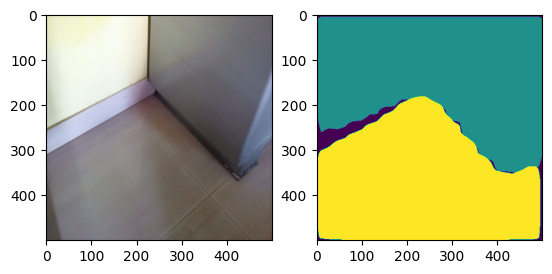

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


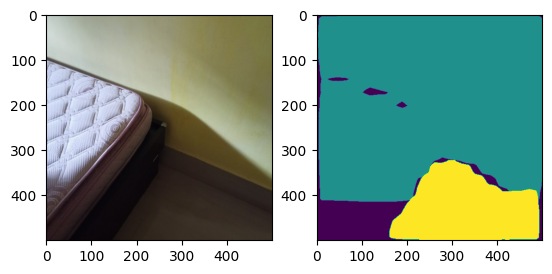

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


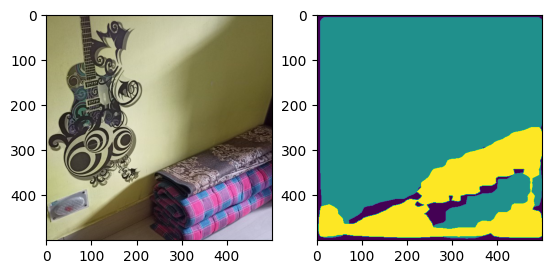

[{'id': 1, 'category_id': 1}]


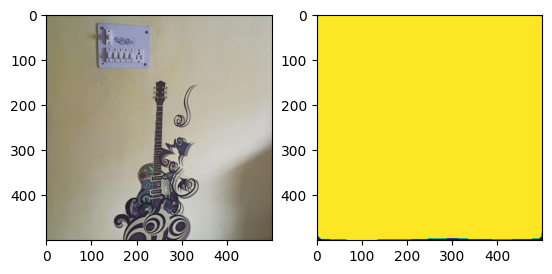

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


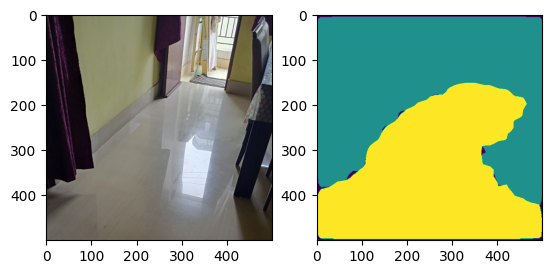

[{'id': 1, 'category_id': 0}, {'id': 2, 'category_id': 1}]


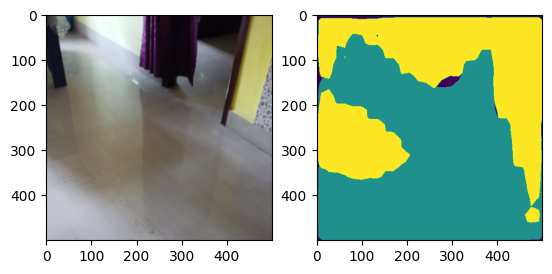

[{'id': 1, 'category_id': 1}]


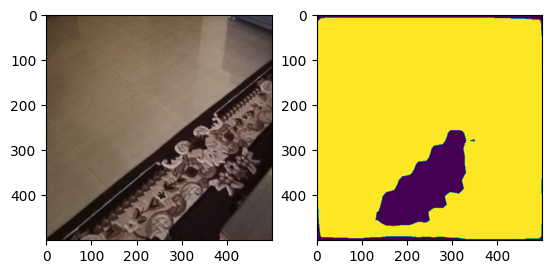

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


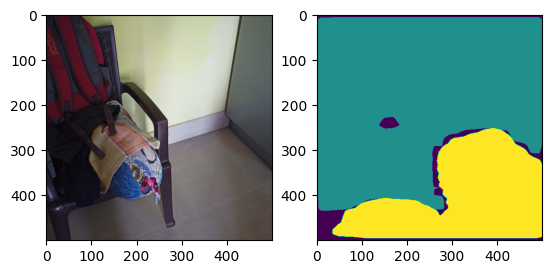

[{'id': 1, 'category_id': 0}, {'id': 2, 'category_id': 1}]


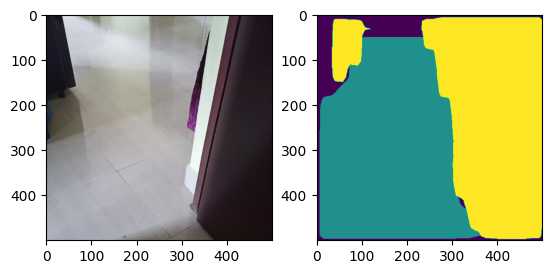

[{'id': 1, 'category_id': 0}]


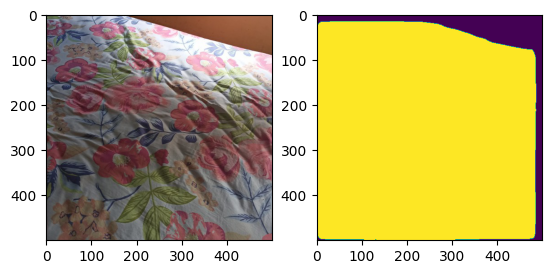

[{'id': 1, 'category_id': 1}]


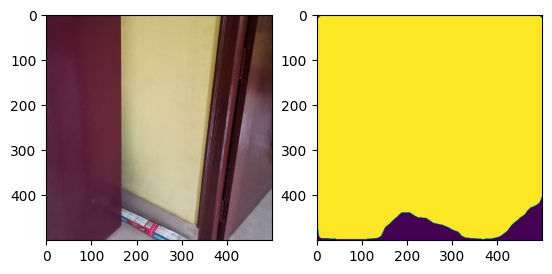

[{'id': 1, 'category_id': 0}, {'id': 2, 'category_id': 1}]


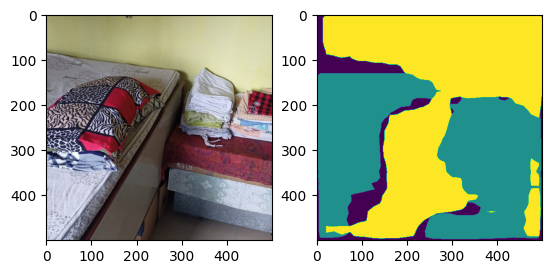

[{'id': 1, 'category_id': 0}, {'id': 2, 'category_id': 1}]


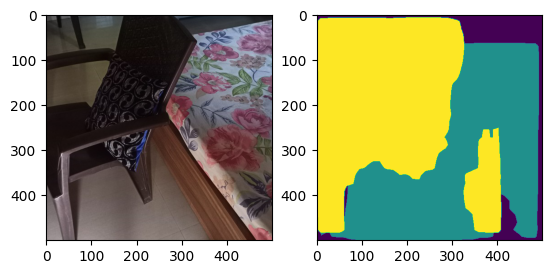

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


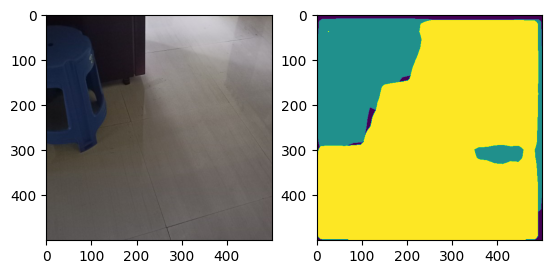

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


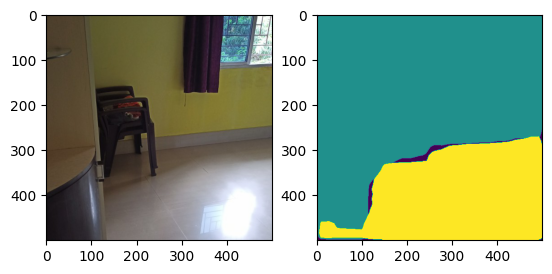

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


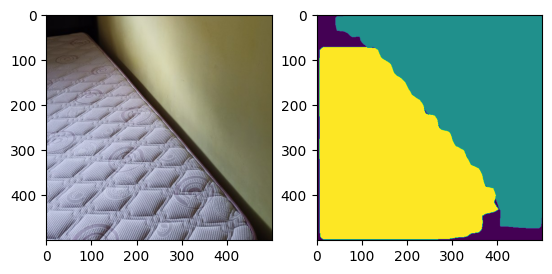

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


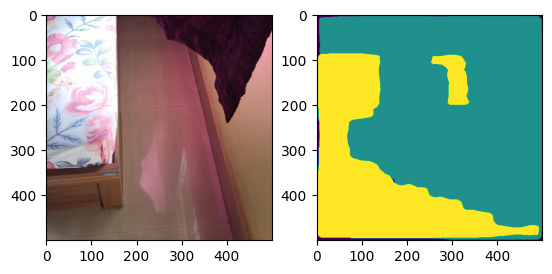

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


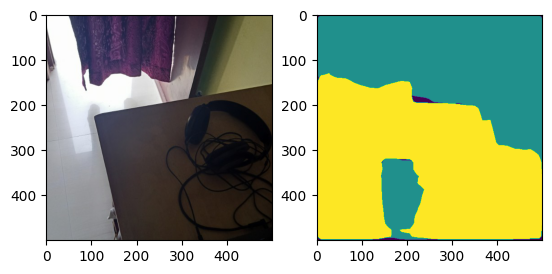

[{'id': 1, 'category_id': 0}, {'id': 2, 'category_id': 1}]


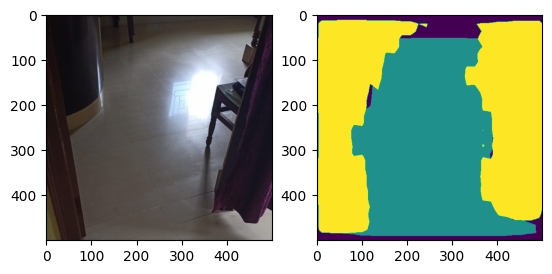

[{'id': 1, 'category_id': 0}, {'id': 2, 'category_id': 1}]


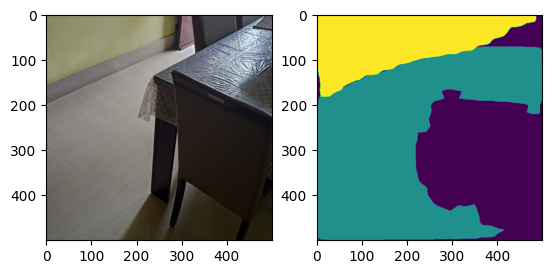

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


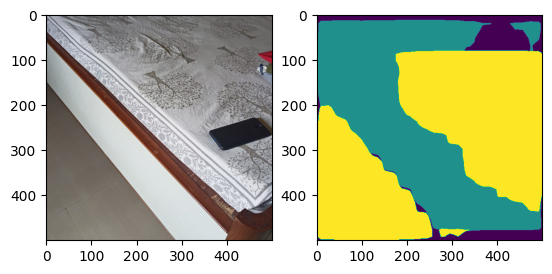

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


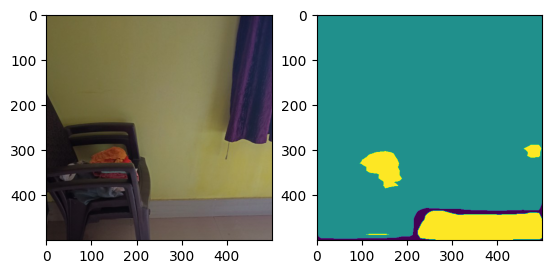

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


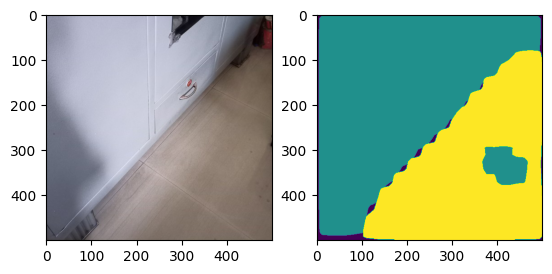

[{'id': 1, 'category_id': 0}, {'id': 2, 'category_id': 1}]


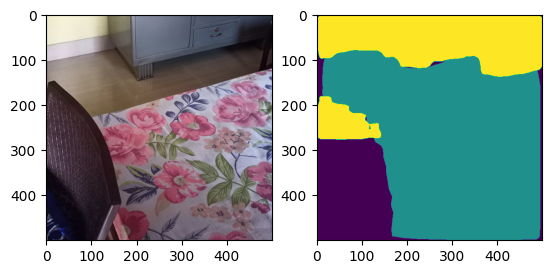

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


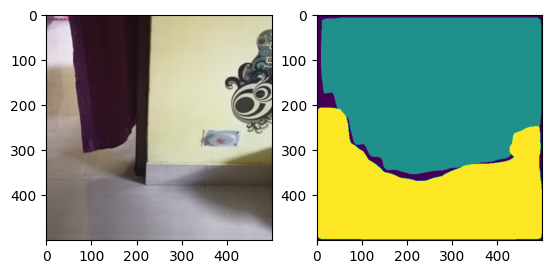

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


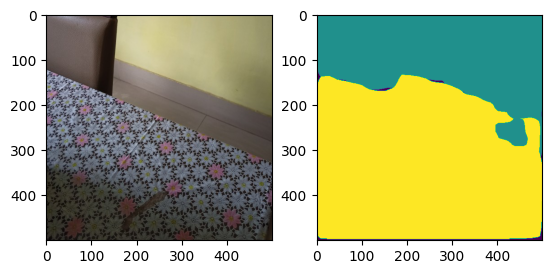

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


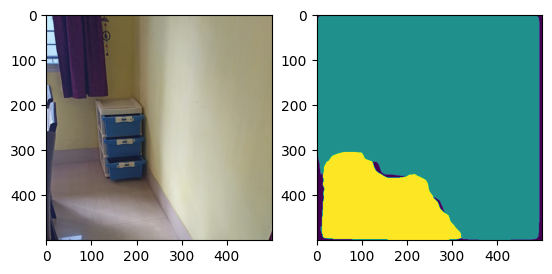

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 0}]


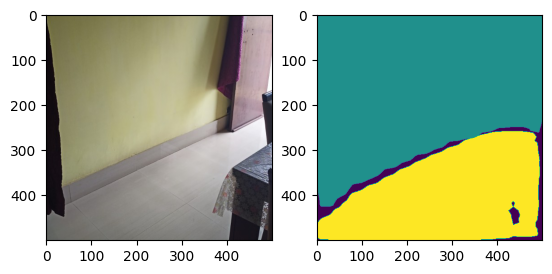

[{'id': 1, 'category_id': 0}, {'id': 2, 'category_id': 1}]


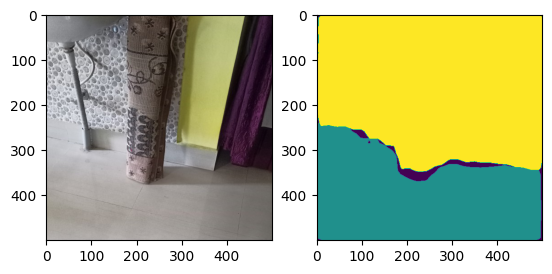

[{'id': 1, 'category_id': 0}, {'id': 2, 'category_id': 1}]


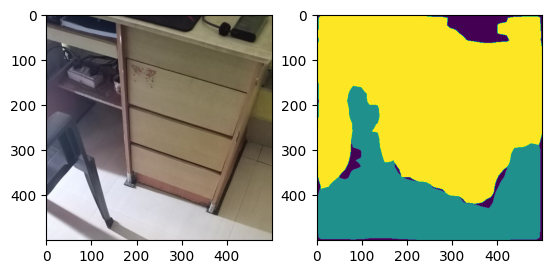

In [ ]:
import matplotlib.pyplot as plt
import os
from utils import visualize
for i in os.listdir('test data resized'):
    # Generate label predictions
    image = plt.imread(os.path.join('test data resized',i))
    segmentation_bitmap, annotations = model(image)
    print(annotations)
    # Visualize the predictions
    visualize(image, segmentation_bitmap)

In [7]:
from segments import SegmentsClient
from segments import SegmentsDataset
api_key = "6b92d0474f7047d8fffa4a8ed0bacec5a41795e1"
segments_client = SegmentsClient(api_key)
dataset_identifier = "tejash/samsung_validation_set"
release = segments_client.get_release(dataset_identifier, 'v0.2')
dataset = SegmentsDataset(release, labelset='ground-truth',filter_by='Reviewed')

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

Initialized dataset with 5 images.


In [10]:
import tensorflow as tf
import numpy as np
def find_average_iou(N,dataset):
 iou=[]
 for i in range(N):
  try:
    m = tf.keras.metrics.MeanIoU(num_classes=15)
    truth=np.array(dataset[i]['segmentation_bitmap'])
    prediction=np.array(model(dataset[i]['image'])[0])
    prediction = tf.reshape(prediction, shape=[-1])
    labels = tf.reshape(truth, shape=[-1])
    weights = tf.compat.v1.to_float(tf.not_equal(labels, False))
    labels = tf.where(tf.equal(labels,False), tf.zeros_like(labels), labels)
    cm=m.update_state(labels,prediction).numpy()
    iou_score=(cm[1][1]+cm[2][2])/(cm[1][1]+cm[2][2]+cm[1][2]+cm[2][1])
    if(np.isnan(iou_score)):
      continue
    iou.append(iou_score)
  except Exception as e:
    print(e)

 return np.mean(iou)

In [11]:
print ("Average IoU = ", find_average_iou(5,dataset))

Average IoU =  0.71351916


In [ ]:
from sklearn import metrics
jscore=[]
for i in range(5):
  truth=np.array(dataset[i]['segmentation_bitmap']).reshape(-1)
  prediction=np.array(model(dataset[i]['image'])[0]).reshape(-1)
  x=metrics.jaccard_score(truth, prediction,average=None)
  jscore.append(metrics.jaccard_score(truth, prediction,average=None))
dim=[]
for i in range(len(jscore)):
  dim.append(len(jscore[i]))
max_dim=max(dim)
jscore1=[]
for i in range(5):
  x=list(jscore[i])
  if(len(x)!=max_dim):
    for i in range(max_dim-len(jscore[i])):
      x.append(0.0)
  jscore1.append(x)
print("Jacquard Score=",np.mean(np.array(jscore1),axis=0))

Jacquard Score= [0.         0.84837586 0.47443838 0.        ]


In [ ]:
# Visualize a few samples in the datasetsample['name'],sample['image'],sample['segmentation_bitmap']
"""import numpy as np
import matplotlib.pyplot as plt
for sample in dataset:
  plt.imshow(np.array(sample['segmentation_bitmap'])/255)
  plt.show()"""

In [ ]:
"""from detectron2.checkpoint import DetectionCheckpointer
from detectron2.modeling import build_model
import pickle
import os
cfg=pickle.load(open('cfg.pkl','rb'))
det_model = build_model(cfg)
DetectionCheckpointer(det_model).resume_or_load(cfg.MODEL.WEIGHTS, resume=False)"""

In [ ]:
"""!sudo apt-get update
!sudo apt-get install -y --no-install-recommends \
      build-essential \
      git \
      libgoogle-glog-dev \
      libgtest-dev \
      libiomp-dev \
      libleveldb-dev \
      liblmdb-dev \
      libopencv-dev \
      libopenmpi-dev \
      libsnappy-dev \
      libprotobuf-dev \
      openmpi-bin \
      openmpi-doc \
      protobuf-compiler \
      python-dev \
      python-pip
!pip install --user \
      future \
      numpy \
      protobuf \
      typing \
      hypothesis
!sudo apt-get install -y --no-install-recommends \
      libgflags-dev \
      cmake
!git clone https://github.com/pytorch/pytorch.git && cd pytorch
!git submodule update --init --recursive
!python pytorch/setup.py install
!pip install onnx
from detectron2.export.caffe2_export import export_onnx_model
o_model=export_onnx_model(det_model,(1,257,257,3))"""

In [ ]:
#!tar -cvf model.tar output
#!sudo apt install subversion
#!svn checkout https://github.com/tensorpack/tensorpack/trunk/examples/FasterRCNN
"""DetectionCheckpointer(det_model).resume_or_load(cfg.MODEL.WEIGHTS, resume=False)
checkpointer = DetectionCheckpointer(det_model, save_dir='output/supervised')

from collections import OrderedDict
weights = OrderedDict()
for p in checkpointer.model.state_dict():
    weights[p] = checkpointer.model.state_dict()[p].cpu().numpy()

with open(os.path.join("det_model.pkl"), 'wb') as f:
    myModel = {'model': weights, '__author__': "Tejas"}
    pickle.dump(myModel, f)
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!python FasterRCNN/convert_d2/convert_d2.py --d2-config config.yaml --d2-pkl det_model.pkl --output model.npz
!cp model.npz det_model.npz
!pip install --upgrade git+https://github.com/tensorpack/tensorpack.git
!python FasterRCNN/predict.py --output-pb model.pb --load model.npz  --config DATA.BASEDIR= 'MODE_MASK=True' 'MODE_FPN=True' 'BACKBONE.STRIDE_1X1=True' 'PREPROC.PIXEL_MEAN=[123.675,116.28,103.53]' 'PREPROC.PIXEL_STD=[1.0,1.0,1.0]'""